# Иследование успешности игр

Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation), мне нужно выявить определяющие успешность игры закономерности. 

Это позволит руководсву компании сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

# Шаг 1. Открытие файлов с данными и изучение общей информации

Для начана импортирую библиотеки и открою таблицу

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import math

In [2]:
df = pd.read_csv('/datasets/games.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Предвортельно вижу:
 - Название столбцов которые нужно привести в нижнеру регистру
 - столбцы, которые нужно привести к логическому типу данных
 - пропуски в 6 столбцах
 - дополнительно проверю дубликаты в строках, возможно там тоже есть значения с разными регистрами
 
 Начну с приведения к нижнему регистру все названия столбцов
 

# Шаг 2. Предподготовка данных

In [4]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Приведу год к типу инт методом astype, и взгляну на пропущщенные

In [5]:
df['year_of_release'] = df['year_of_release'].round().astype('Int64')
df[df['year_of_release'].isnull()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


Вижу пропущенные значений, часть можно заполнить из названия спортивных симуляторов, но так как год в названии таких игр не всегда соотвествует году выпуску я этого делать не буду. Значения оставлю пустые

Поподробнее гляну на значения 'user_score'

In [6]:
df['user_score'].value_counts().head(10)

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: user_score, dtype: int64

вижу значение 'tbd', что значит оценка еще не определена, скорее всего это значит что даную игру некое количество пользователей оценили, но данное количество не достаточно для того что бы вывести средний результат

Заменю значения 'tbd' на NaN, так как не виже значений которые могут коррелировать с рейтингом игроков

In [7]:
df['user_score'] = df['user_score'].replace('tbd',np.NaN).astype('Float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16715 non-null object
year_of_release    16446 non-null Int64
genre              16713 non-null object
na_sales           16715 non-null float64
eu_sales           16715 non-null float64
jp_sales           16715 non-null float64
other_sales        16715 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             9949 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


вижу большое количество пропусков в столбцах с оценкой и рейтингом

выше я видел игры с годом выпуска 1996, сомневаюсь что в эти года играм присваивали рейтинг, а игроки и эксперты им давали четкие оценки, выведу сводную таблицу с годами, где индекс задам год, и посмотрю количество остальных значений

In [8]:
df.pivot_table(index='year_of_release', aggfunc='count')

,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,platform,rating,user_score
year_of_release,,,,,,,,,,
1980,0,9,9,9,9,9,9,9,0,0
1981,0,46,46,46,46,46,46,46,0,0
1982,0,36,36,36,36,36,36,36,0,0
1983,0,17,17,17,17,17,17,17,0,0
1984,0,14,14,14,14,14,14,14,0,0
1985,1,14,14,14,14,14,14,14,1,1
1986,0,21,21,21,21,21,21,21,0,0
1987,0,16,16,16,16,16,16,16,0,0
1988,1,15,15,15,15,15,15,15,1,1


я был прав, до 1999 года оценки и рейтинг присваивался очень редко, да и игр выходило не так много, годами позже замечаю что рейтин и оценки присваиваиваются не всем играм, пропуски скорее ошибка попытаюсь найти с чем они корелируют


In [9]:
raiting_null=df[df['rating'].isnull()]

raiting_null.pivot_table(index='platform', aggfunc='count')

,critic_score,eu_sales,genre,jp_sales,na_sales,name,other_sales,rating,user_score,year_of_release
platform,,,,,,,,,,
2600,0,133,133,133,133,133,133,0,0,116
3DO,0,3,3,3,3,3,3,0,0,3
3DS,1,292,292,292,292,292,292,0,1,289
DC,0,38,38,38,38,38,38,0,0,38
DS,2,878,878,878,878,878,878,0,1,866
GB,0,98,98,98,98,98,98,0,0,97
GBA,0,300,300,300,300,300,300,0,0,297
GC,0,87,87,87,87,87,87,0,0,85
GEN,0,29,27,29,29,27,29,0,0,29


не обнаруживаю корреляцию отсуствия рейтинга и оценок с типом платформы или жанра игры, но вижу что они пропуски коррелируют между друг другом, в больше нсве случаем трисуствует сразу три пустых значения в строке, в стобцах рейтинга и оценок.

не буду заполнять пропуски  так как не вижу корреляции и удалять не буду, так как при удалении потеряю почти половину значений.
 
разберусь с другими пропусками, замечаю что есть по 2 пропущенных в стобцах 'name' и 'genre', гляну на них 

In [10]:
display(df[df['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


два значения с непонятным жанром и названием, удалю данные строки из нашей таблицы

In [11]:
df = df.drop([659,14244])
display(df[df['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


теперь гляну на строкив столбцах 'platform' и 'genre', что бы убедится что нет дубликатов с разным регистром или еще что нибудь

In [12]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64

In [13]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

Вроде все хорошо, теперь создам отдельный столбец с общими продажами

In [14]:
df['total_sales'] = df[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


# Шаг 3. Исследовательский анализ данных

Начну анализ с того что гляну через гистограмму на количество игр выпущенной за год

Text(0, 0.5, 'кол-во игр')

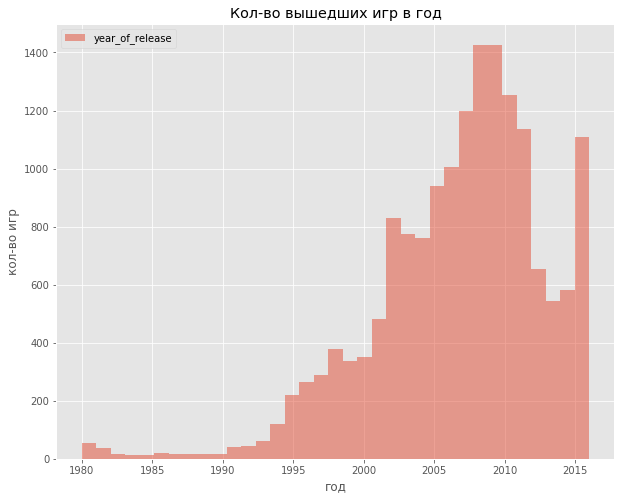

In [15]:
plt.style.use('ggplot') 

df['year_of_release'].plot.hist(alpha=0.5, legend=True, bins=35, figsize=(10,8))


plt.title('Кол-во вышедших игр в год')
plt.xlabel('год')
plt.ylabel('кол-во игр')

вижу что игры с 1980 по 1995 представленны в меньшем количестве чем другие года, да и приставки выпущенные в те года уже не актуальны на сегодняшний день, по этому данные за этот период кажутся не важными, поэтому удалю период до 2000 г и выберу наиболее комерчески успешные платформы

In [16]:
top_platform = df.query('year_of_release >= 2000').pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values('total_sales', ascending = False).head(10)
top_platform

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.76
PS4,314.14
GBA,312.88
PSP,289.53
3DS,257.81


посмотрю по ним распределение по годам, и увижу жиненый цикл консолей

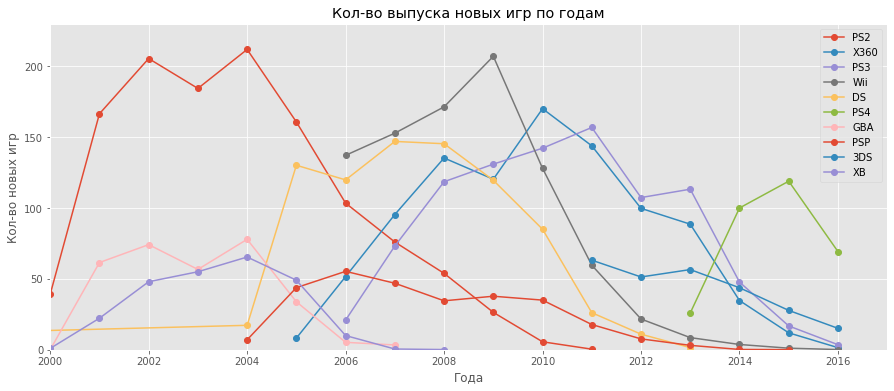

In [17]:
location = top_platform.index

fig, ax = plt.subplots()
for plat in location :
    games_sales_plot = df.query('platform == @plat')
    games_sales_plot = games_sales_plot.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
    games_sales_plot.plot(y='total_sales', style='o-', ylim=(0, 230), xlim=(2000, 2017), grid=True, figsize=(15, 6), ax=ax)
plt.xlabel('Года')
plt.ylabel('Кол-во новых игр')
plt.title('Кол-во выпуска новых игр по годам')
plt.legend(top_platform.index)
plt.show()

Вижу что средний показатель жизни консоли это примерно 9 лет, в середине жизненого цикла консоли достигают пиков продаж игр, исходя из этого логично будет взять именно половину среднего срока жизни консолей, для того что бы наилучшим оброзом проанализировать продажи и спрогназировать продажи на 2017 год, возьму данные с 2013 года.

Выведу наиболее успешные платформы за этот период, и посмотрю рост и падения продаж игр по ним

In [18]:
df_main = df.query('year_of_release >= 2013 & platform')
df_main_platform = df_main.pivot_table(
    index = 'platform', 
    values = 'total_sales', 
    aggfunc = 'sum').sort_values('total_sales', ascending = False)
top_platform
df_main_platform

,total_sales
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Теперь гляну как распределяются продажи игр на данные консоли на графике

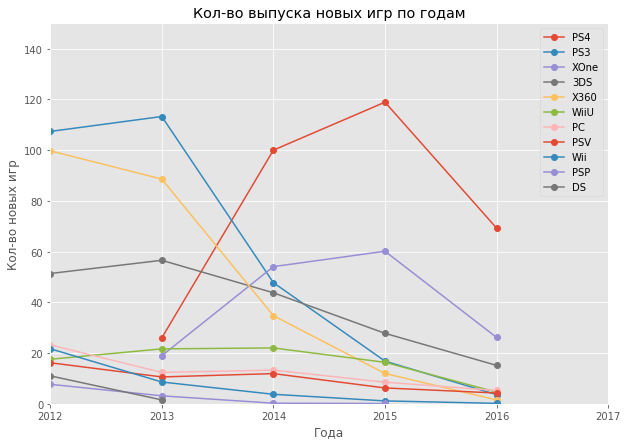

In [19]:
location = df_main_platform.index

fig, ax = plt.subplots()
for plat in location:
    games_sales_plot = df.query('platform == @plat')
    games_sales_plot = games_sales_plot.groupby('year_of_release').agg(total_sales=('total_sales','sum'))
    games_sales_plot.plot(y='total_sales', style='o-', ylim=(0, 150), xlim=(2012, 2017), grid=True, figsize=(10, 7), ax=ax)
plt.xlabel('Года')
plt.ylabel('Кол-во новых игр')
plt.title('Кол-во выпуска новых игр по годам')
plt.legend(df_main_platform.index)
plt.show()

На основании выводов сделанных ранее, и ссылаясь на полученый график, можно прийти к выводу что наиболее перспективными по прадажам игр в 2017 году будут являться консоли XOne и PS4, остальные консоли как видно заканчивают свой жизненый цикл

Построю график «ящик с усами» по глобальным продажам игр в разбивке по платформам

In [20]:
df_main = df_main.query('platform != ("PSP","Wii","DS")')#удалил консоли уоторые в нашем периоде минимальные продажи

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


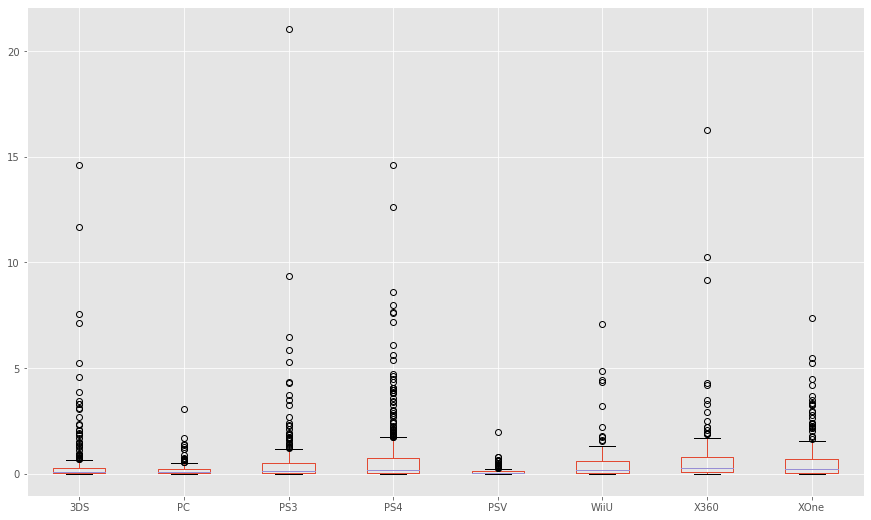

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
count,303.000000,189.000000,345.000000,392.000000,358.000000,115.000000,186.000000,247.000000
mean,0.472772,0.208624,0.525884,0.801378,0.092151,0.562000,0.735484,0.645020
std,1.381347,0.352304,1.451939,1.609456,0.153816,1.038778,1.663275,1.036139
min,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000,0.010000
25%,0.040000,0.030000,0.040000,0.060000,0.020000,0.060000,0.080000,0.060000
50%,0.090000,0.080000,0.150000,0.200000,0.040000,0.200000,0.265000,0.220000
75%,0.280000,0.230000,0.510000,0.730000,0.110000,0.595000,0.795000,0.685000
max,14.600000,3.050000,21.050000,14.630000,1.960000,7.090000,16.270000,7.390000


In [21]:
df_main.pivot_table(index='name', columns = 'platform', values = 'total_sales').boxplot(figsize=(15, 9))
plt.show()
df_main.pivot_table(index='name', columns = 'platform', values = 'total_sales').describe()

Как видно из графика и описания большая часть игр почти на всех консолях не преодалевает порог 500 тысяч продаж, и средняя варируется примерно в 500 тысяч, при этом видны выбросы достигающие до 20 милионов продаж. 

Теперь гляну как коррелируют отзывы критиков и игроков с продажами, начну с PS4

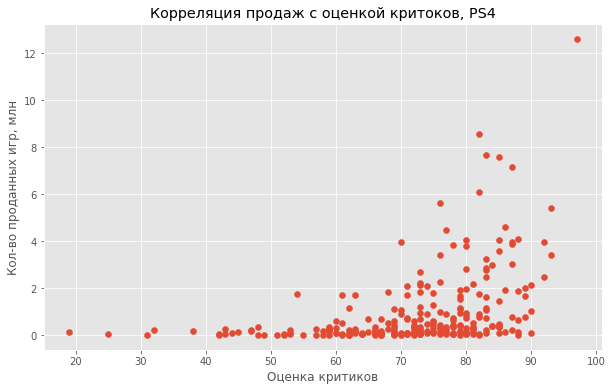

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


In [22]:
df_PS4 = df_main.query('platform == "PS4"')
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = df_PS4['critic_score'], y = df_PS4['total_sales'])
plt.xlabel('Оценка критиков')
plt.ylabel('Кол-во проданных игр, млн')
plt.title('Корреляция продаж с оценкой критоков, PS4')
plt.show()

df_PS4[['critic_score', 'total_sales']].corr()

Корреляцию уже видно, но уберем выбросы через квантили и проверим еще раз, что бы не писать длинный код создам функции

In [27]:
def corr_console_user (row):
    console = df_main.query("platform == @row")
    q1 = console['total_sales'].quantile(0.25)
    q3 = console['total_sales'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    console = console[console['total_sales'].between(lower_bound, upper_bound, inclusive=True)]
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.scatter(x = console['user_score'], y = console['total_sales'])
    plt.show()
    return console[['user_score', 'total_sales']].corr()


def corr_console_critic (row):
    console = df_main.query("platform == @row")
    q1 = console['total_sales'].quantile(0.25)
    q3 = console['total_sales'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr) 
    upper_bound = q3 + (1.5 * iqr)
    console = console[console['total_sales'].between(lower_bound, upper_bound, inclusive=True)]
    fig, ax = plt.subplots(figsize=(5, 4))
    ax.scatter(x = console['critic_score'], y = console['total_sales'])
    plt.show()
    return console[['critic_score', 'total_sales']].corr()


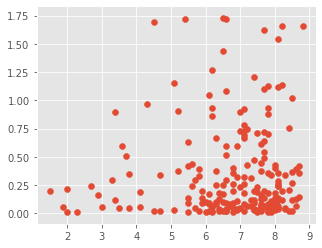

,user_score,total_sales
user_score,1.000000,0.032088
total_sales,0.032088,1.000000


In [28]:
corr_console_user ('PS4')

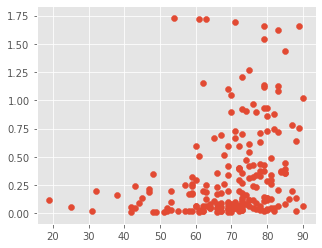

,critic_score,total_sales
critic_score,1.000000,0.264572
total_sales,0.264572,1.000000


In [29]:
corr_console_critic ('PS4')

Как видно отчетливая корреляция имеется с критиками а вот с играками видно что корелячии почти нет.

Проделаю то же самое и сдругими популярными консолями

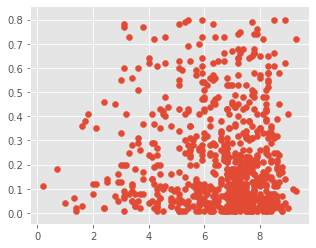

,user_score,total_sales
user_score,1.000000,-0.019098
total_sales,-0.019098,1.000000


In [30]:
top_platforms = ['PS3','X360','XOne','PSV', 'PC','3DS']
corr_console_user (top_platforms)

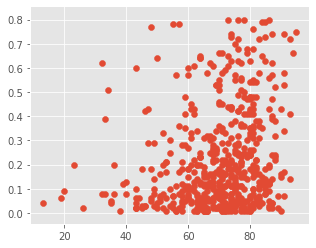

,critic_score,total_sales
critic_score,1.000000,0.221241
total_sales,0.221241,1.000000


In [31]:
corr_console_critic (top_platforms)

на других консолях пподтверждается та же корреляция что и с ps4

Посмотрю на общее распределение игр по жанрам, выделю для себя наиболее прибыльный жанр

In [32]:
df_genre = df_main.pivot_table(index = 'genre',  values =  'total_sales', aggfunc = ('sum', 'count'))
df_genre['mean_sale'] = df_genre['sum']/ df_genre['count']
df_genre.sort_values('mean_sale', ascending =False)

,count,sum,mean_sale
genre,,,
Shooter,187,232.98,1.245882
Sports,205,148.98,0.726732
Platform,70,39.69,0.567000
Role-Playing,285,144.86,0.508281
Racing,85,39.89,0.469294
Fighting,79,35.29,0.446709
Action,744,317.69,0.427003
Misc,139,55.51,0.399353
Simulation,60,21.41,0.356833


Вижу что наиболле прибыльные жанры это шутеры и спортивные симуляторы

# Шаг 4. Состовление портрета пользователя каждого региона

Определю для пользователя каждого региона ( япония, северная америка и европа):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?


,jp_sales,eu_sales,na_sales
platform,,,
3DS,67.81,30.96,38.20
PC,0.00,25.36,11.11
PS3,23.35,67.81,63.50
PS4,15.96,141.09,108.74
PSV,18.59,6.10,5.04
WiiU,10.88,19.85,29.21
X360,0.51,42.52,81.66
XOne,0.34,51.59,93.12


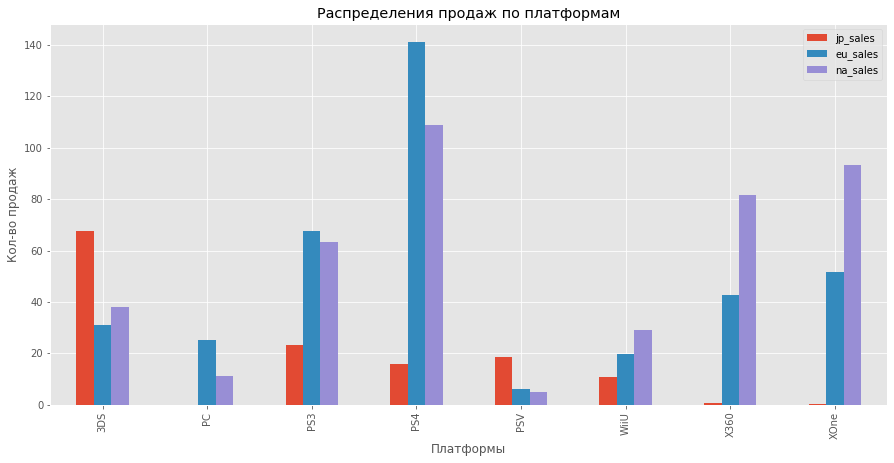

In [33]:
jp_platform =df_main.pivot_table(
    index = 'platform', 
    values =  'jp_sales', 
    aggfunc = 'sum')

eu_platform = df_main.pivot_table(
    index = 'platform', 
    values =  'eu_sales', 
    aggfunc = 'sum')

na_platform = df_main.pivot_table(
    index = 'platform', 
    values =  'na_sales', 
    aggfunc = 'sum')

all_platform = jp_platform.join((eu_platform, na_platform))

display(all_platform)
all_platform.plot(kind = 'bar',figsize=(15, 7), style='o-')
plt.xticks(np.arange(len(all_platform)), all_platform.index)
plt.xlabel('Платформы')
plt.ylabel('Кол-во продаж')
plt.title('Распределения продаж по платформам')
plt.legend(all_platform.columns)
plt.show()

вижу что предпочтения игроков в консолх отличается, в японии предпочитают 3DS, в европе предпочитают приставки PS4, а в штатах PS4 и XOne держуться пости на равне

Посомтрю что с жанрами игр

,jp_sales,eu_sales,na_sales
genre,,,
Action,39.65,116.76,124.35
Adventure,5.11,8.09,7.10
Fighting,7.63,8.55,15.55
Misc,8.98,17.04,24.00
Platform,4.79,14.31,16.72
Puzzle,1.18,1.00,0.83
Racing,2.30,20.19,12.96
Role-Playing,50.01,36.97,46.40
Shooter,6.61,87.86,109.74


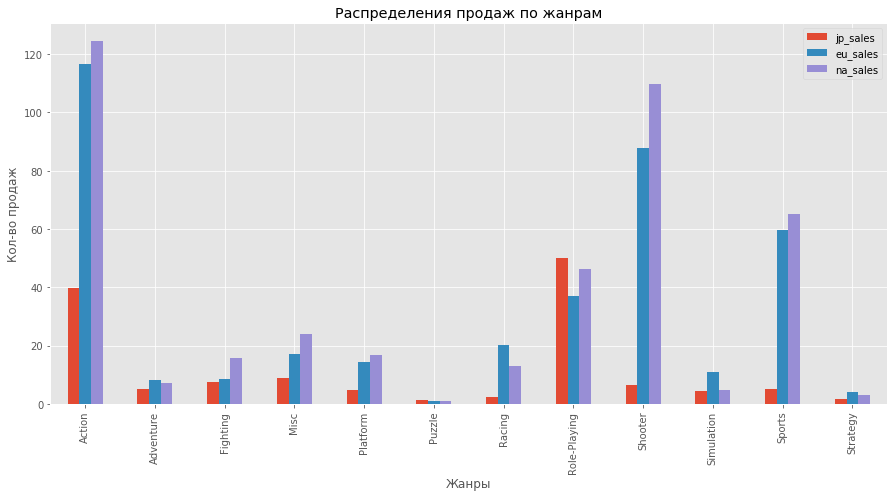

In [34]:
jp_genre =df_main.pivot_table(
    index = 'genre', 
    values =  'jp_sales', 
    aggfunc = 'sum')

eu_genre = df_main.pivot_table(
    index = 'genre', 
    values =  'eu_sales', 
    aggfunc = 'sum')

na_genre = df_main.pivot_table(
    index = 'genre', 
    values =  'na_sales', 
    aggfunc = 'sum')

all_genre = jp_genre.join((eu_genre, na_genre))

display(all_genre)
all_genre.plot(kind = 'bar', figsize=(15, 7), style='o-')
plt.xticks(np.arange(len(all_genre)), all_genre.index)
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Распределения продаж по жанрам')
plt.legend(all_genre.columns)
plt.show()

В жанрах так же наблюдаются отличия, в японии наибольша часть продаж это продажи ролевых игр, а в европе и штатах, преобладают  акшены и шутеры. Предполагаю что данные отличия связаны с разным менталитетом и культурой людей.

,jp_sales,eu_sales,na_sales
rating,,,
E,15.00,81.67,78.46
E10+,5.89,37.97,47.97
M,14.11,145.32,165.21
T,20.44,41.92,49.79


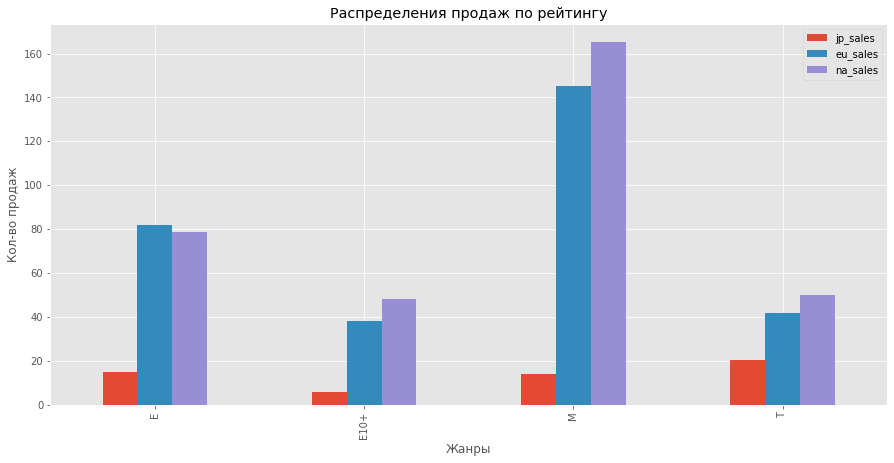

In [35]:
jp_rating =df_main.pivot_table(
    index = 'rating', 
    values =  'jp_sales', 
    aggfunc = 'sum')

eu_rating = df_main.pivot_table(
    index = 'rating', 
    values =  'eu_sales', 
    aggfunc = 'sum')

na_rating = df_main.pivot_table(
    index = 'rating', 
    values =  'na_sales', 
    aggfunc = 'sum')

all_rating = jp_rating.join((eu_rating, na_rating))

display(all_rating)
all_rating.plot(kind = 'bar',figsize=(15, 7), style='o-')
plt.xticks(np.arange(len(all_rating)), all_rating.index)
plt.xlabel('Жанры')
plt.ylabel('Кол-во продаж')
plt.title('Распределения продаж по рейтингу')
plt.legend(all_rating.columns)
plt.show()

Вижу что в японии большая часть продаж приходиться на рейтинг Т(подростки), в вот в штатах и европе вижу что большая часть продаж приходится на рейтиг М(для взрослых), это поддалкивает на мысль что рейтинг имеет влияние на продажи.

# Шаг 5. Проверка гипотез

Проверю первую гипотезу что, средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Перед проверкой через нулевую гипотезу определюсь с понятиями

- Нулевая гипотеза – это гипотеза об отсуствии значимы различий между какими либо показателями,или о случайной связи между ними.
Это значит что при подтверждении нулевой гипотезы, средние пользовательские рейтинги платформ Xbox One и PC с высокой вероятность одинаковые.

- Альтернативная гипотеза – это гипотеза о занчимости различия между сравниваемыми величинами, а значит при подтверждении данной гипотезы,  средние пользовательские рейтинги платформ Xbox One и PC с высокой вероятность будут отличаться.

In [37]:
Xbox_One = df_main.query('platform == "XOne"')
PC = df_main.query('platform == "PC"')

alpha = 0.05 

print('cредняя оценка пользователей игрн на Xbox One:', pd.Series(Xbox_One['user_score']).mean())
print('cреднее оценка пользователей игрн на PC:', pd.Series(PC['user_score']).mean())

results = st.ttest_ind(Xbox_One['user_score'], PC['user_score'], nan_policy="omit")


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя оценка пользователей игрн на Xbox One: 6.521428571428572
cреднее оценка пользователей игрн на PC: 6.269677419354839
p-значение: 0.1401265840361139
Не получилось отвергнуть нулевую гипотезу


Не отвергаем нулевую гипотезу о равенстве. Стало быть, можно считать что гипотеза о том что средние пользовательские оценки игр платформ Xbox One и PC действительно одинаковые, а если есть разница, то она случайна.

Теперь проверю гипотезу что средние пользовательские рейтинги жанров Action и Sports разные.

In [38]:
Action = df_main.query('genre == "Action"')
Sports = df_main.query('genre == "Sports"')

alpha = 0.05 

print('cредняя оценка пользовательей игр жанра Action:', pd.Series(Action['user_score']).mean())
print('cреднее оценка пользовательей игр жанра Sports:', pd.Series(Sports['user_score']).mean())

results = st.ttest_ind(Action['user_score'], Sports['user_score'], nan_policy="omit")


print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

cредняя оценка пользовательей игр жанра Action: 6.8496124031007755
cреднее оценка пользовательей игр жанра Sports: 5.261783439490446
p-значение: 4.172703051737009e-27
Отвергаем нулевую гипотезу


Для выбранного уровня значимости отвергаем нулевую гипотезу, вывод - действительно средние пользовательские рейтинги жанров Action и Sports отличаются.

# Шаг  6. Вывод

Мне удалось выявить следующие закономерности успешности игр для планирования рекламной компании по регионам:
 - Северная америка: 
 1. Приставки: PS4, Xbox One, Xbox360
 2. Жанры: Action, Sports, Shooter
 3. Рейтинг: М.
 
 - Европа
 1. Приставки: PS4, PS3
 2. Жанры: Action, Sports, Shooter
 3. Рейтинг: М, E.
 
 - Япония
 1. Приставки: 3DS, PS4, PS3
 2. Жанры: Role-Playing, Action
 3. Рейтинг: T, М
 
И конечно игры должны имеють положительне отзывы от критиков, в этом случаю успешность проекта возрастает как показывает проведенные тесты  корреляции.
